![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [100]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


In [101]:
print("Total number of crimes in the dataset: {}".format(len(crimes)))

Total number of crimes in the dataset: 247988


In [102]:
crimes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247988 entries, 0 to 247987
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         247988 non-null  int64         
 1   Date Rptd     247988 non-null  datetime64[ns]
 2   DATE OCC      247988 non-null  datetime64[ns]
 3   TIME OCC      247988 non-null  object        
 4   AREA NAME     247988 non-null  object        
 5   Crm Cd Desc   247988 non-null  object        
 6   Vict Age      247988 non-null  int64         
 7   Vict Sex      215740 non-null  object        
 8   Vict Descent  215739 non-null  object        
 9   Weapon Desc   80087 non-null   object        
 10  Status Desc   247988 non-null  object        
 11  LOCATION      247988 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 22.7+ MB


In [103]:
crimes.describe()

,DR_NO,Date Rptd,DATE OCC,Vict Age
count,2.479880e+05,247988,247988,247988.000000
mean,2.256571e+08,2022-12-14 01:18:45.751246080,2022-12-01 12:02:48.627514368,29.954764
min,2.203000e+03,2022-06-01 00:00:00,2020-01-01 00:00:00,-2.000000
25%,2.210130e+08,2022-09-06 00:00:00,2022-08-27 00:00:00,0.000000
50%,2.220131e+08,2022-12-13 00:00:00,2022-12-04 00:00:00,31.000000
75%,2.310058e+08,2023-03-23 00:00:00,2023-03-16 00:00:00,45.000000
max,2.399165e+08,2023-07-03 00:00:00,2023-07-03 00:00:00,99.000000
std,5.042345e+06,NaN,NaN,21.901016


**Listing crime types**

In [104]:
crimeByType = crimes['Crm Cd Desc'].value_counts()
crimeByType

Crm Cd Desc
VEHICLE - STOLEN                            25797
THEFT OF IDENTITY                           23017
BATTERY - SIMPLE ASSAULT                    19970
BURGLARY                                    15163
BURGLARY FROM VEHICLE                       14280
                                            ...  
BIGAMY                                          1
INCITING A RIOT                                 1
GRAND THEFT / INSURANCE FRAUD                   1
FIREARMS RESTRAINING ORDER (FIREARMS RO)        1
DRUGS, TO A MINOR                               1
Name: count, Length: 110, dtype: int64

In [105]:
crimes['Date Rptd'] = pd.to_datetime(crimes['Date Rptd'])
crimes


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
...,...,...,...,...,...,...,...,...,...,...,...,...
247983,231510379,2023-05-29,2023-05-25,1100,N Hollywood,"BUNCO, GRAND THEFT",25,M,W,NaN,Invest Cont,5300 DENNY AV
247984,231604807,2023-01-27,2023-01-26,1800,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,NaN,Invest Cont,12500 BRANFORD ST
247985,231606525,2023-03-22,2023-03-22,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST
247986,231210064,2023-04-12,2023-04-12,1630,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6100 S VERMONT AV


Now, we want to graph the total number of crimes by the year. I decided to add a column that only grabs the year. This will allow us to make it easier to graph and analysis the data.

In [106]:
# Convert 'Date Rptd' column to datetime if it's not already
crimes['Date Rptd'] = pd.to_datetime(crimes['Date Rptd'])

# Create a new column containing only the year part
crimes['Year'] = crimes['Date Rptd'].dt.year

# Display the DataFrame to verify the new column
print(crimes.head())

       DR_NO  Date Rptd   DATE OCC TIME OCC    AREA NAME  \
0  221412410 2022-06-15 2020-11-12     1700      Pacific   
1  220314085 2022-07-22 2020-05-12     1110    Southwest   
2  222013040 2022-08-06 2020-06-04     1620      Olympic   
3  220614831 2022-08-18 2020-08-17     1200    Hollywood   
4  231207725 2023-02-27 2020-01-27     0635  77th Street   

                                       Crm Cd Desc  Vict Age Vict Sex  \
0  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN   
1                                THEFT OF IDENTITY        27        F   
2                                THEFT OF IDENTITY        60        M   
3                                THEFT OF IDENTITY        28        M   
4                                THEFT OF IDENTITY        37        M   

  Vict Descent Weapon Desc  Status Desc  \
0          NaN         NaN  Invest Cont   
1            B         NaN  Invest Cont   
2            H         NaN  Invest Cont   
3            H         NaN  

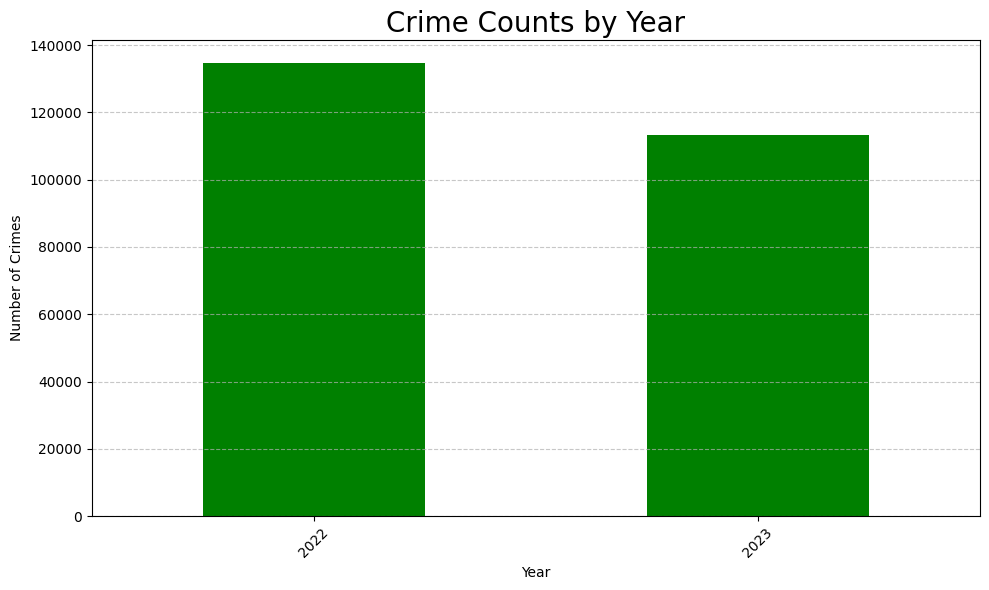

In [107]:
crime_counts_by_year = crimes['Year'].value_counts().sort_index()

# Creating a graph
plt.figure(figsize=(10, 6))
crime_counts_by_year.plot(kind='bar', color='green')
plt.title('Crime Counts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Finding the frequencies of crimes by the hour of occurrence**

In [108]:
crimes['HOUR OCC'] = crimes['TIME OCC'].str[:2].astype(int)
crimes.head(4)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Year,HOUR OCC
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR,2022,17
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,2022,11
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,2022,16
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,2022,12


<Axes: xlabel='HOUR OCC', ylabel='count'>

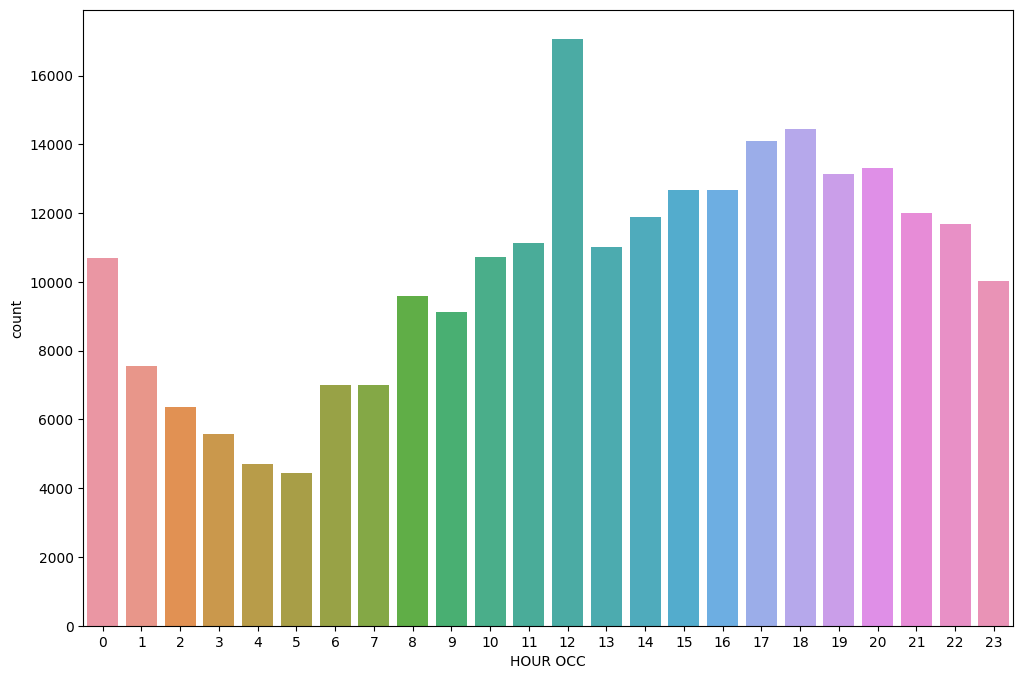

In [109]:
sns.countplot(data=crimes,x="HOUR OCC")

In [110]:
peak_crime_hour = 12 

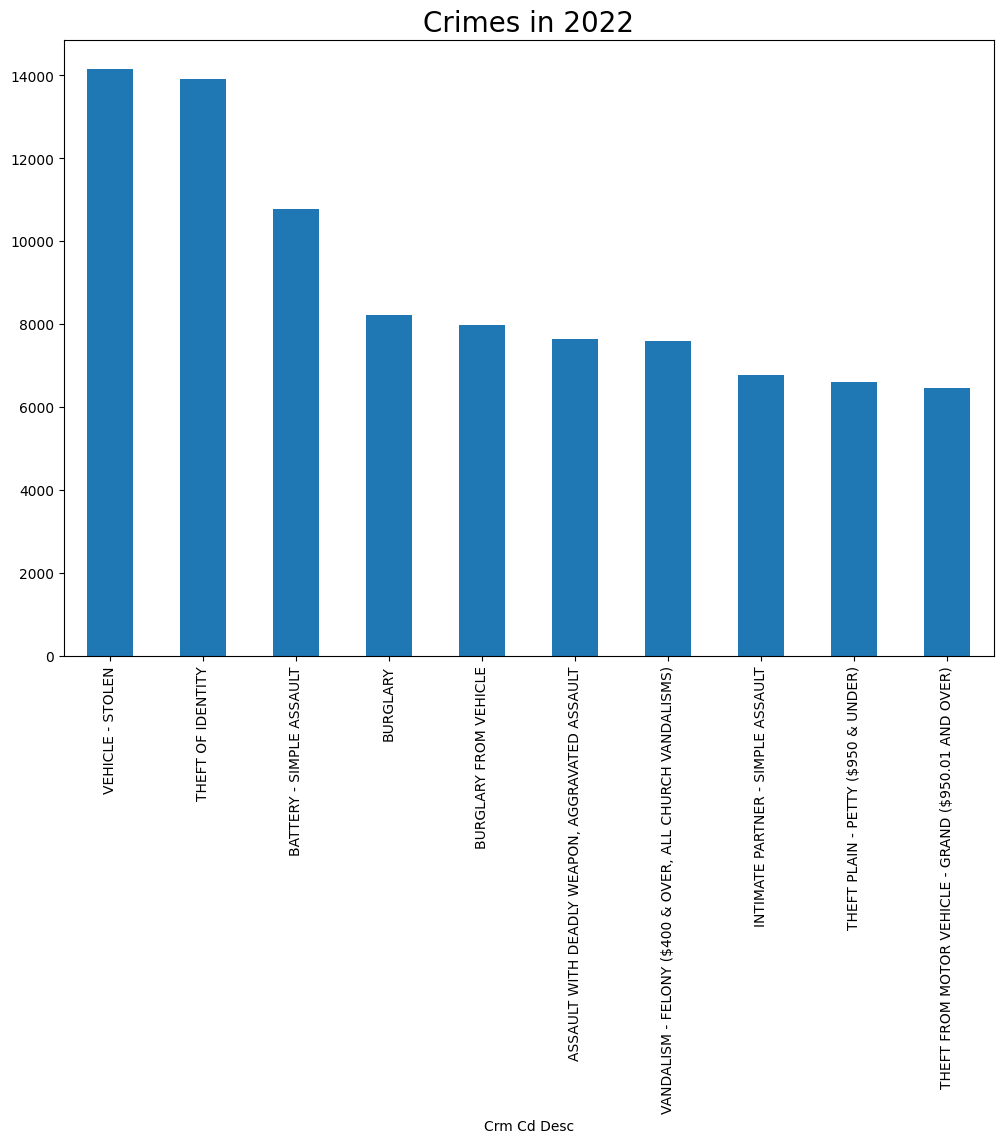

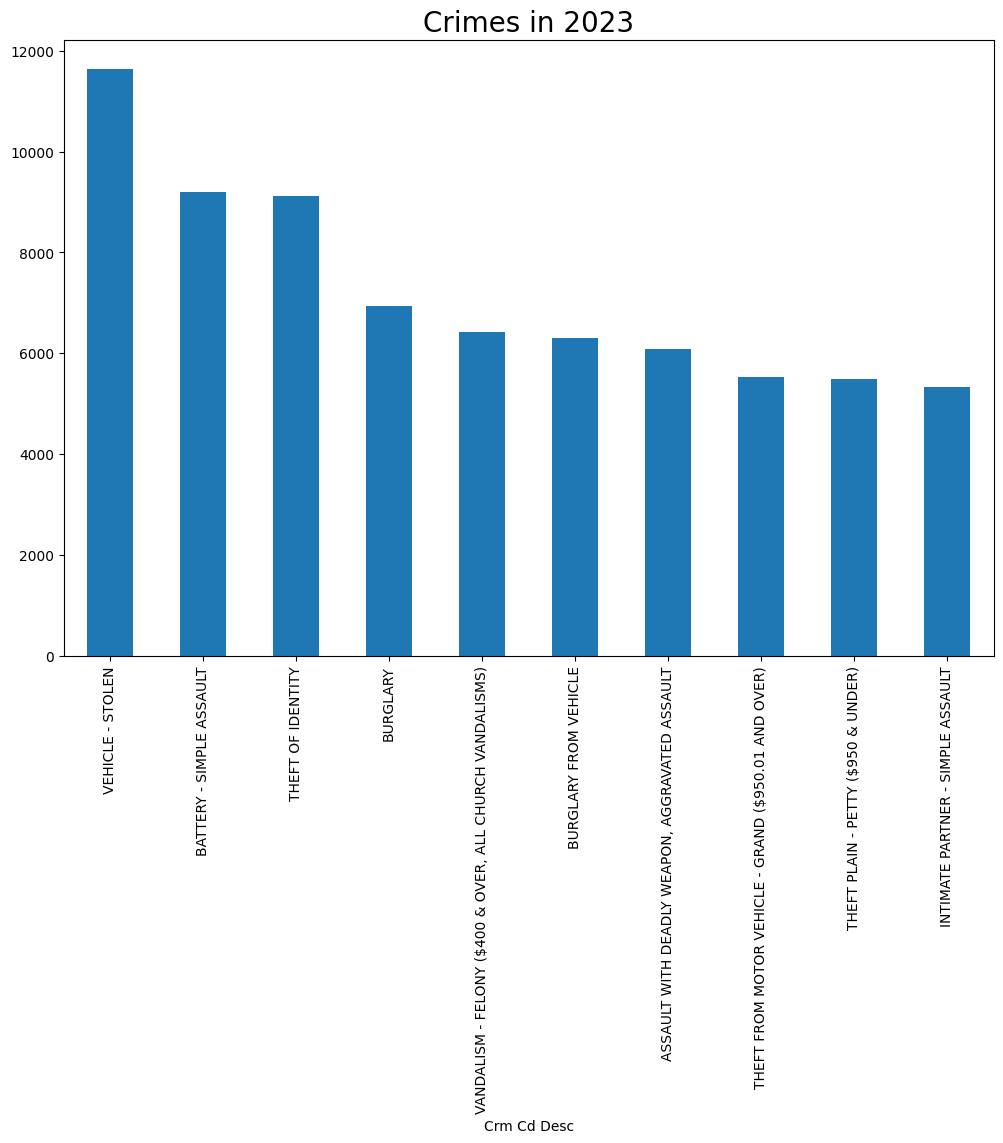

In [111]:
for year in crime_counts_by_year.keys():
    crimeYear = crimes[crimes['Year'] == year]['Crm Cd Desc'].value_counts()[:10]
    crimeYear.plot(kind='bar', title="Crimes in " + str(year))
    plt.show()

**Listing Crime Areas**

In [112]:
crimes['AREA NAME'].value_counts()

AREA NAME
Central        18732
77th Street    15408
Southwest      14194
Pacific        13866
Olympic        12792
Newton         12790
Hollywood      12761
Southeast      12600
Wilshire       12080
N Hollywood    11728
Rampart        11725
West LA        11169
West Valley    10766
Northeast      10686
Van Nuys       10640
Devonshire     10184
Topanga         9968
Harbor          9701
Mission         9175
Hollenbeck      9063
Foothill        7960
Name: count, dtype: int64

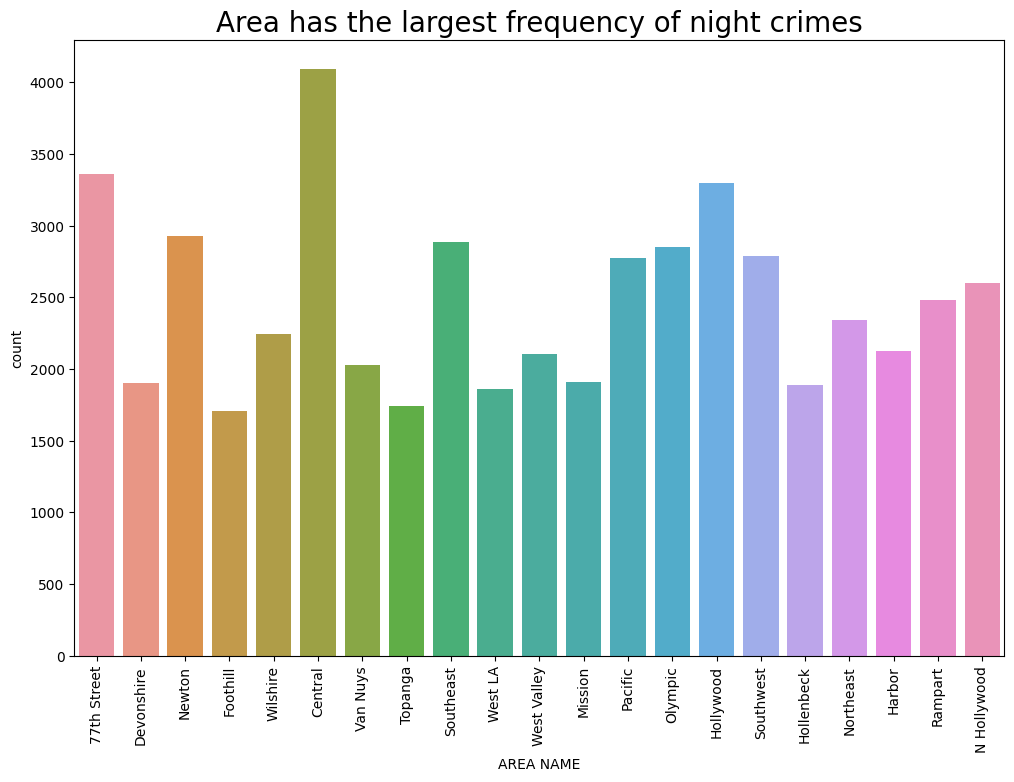

'Central'

In [113]:
# Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59 am)?

night_time = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]
peak_night_crime_location = night_time["AREA NAME"].value_counts().index[0]

sns.countplot(data=night_time,x="AREA NAME")
plt.title("Area has the largest frequency of night crimes")
plt.xticks(rotation=90)
plt.show()

peak_night_crime_location

We take note the Central is the most crime plagued area in Los Angeles. 


In [114]:
# # Which area has the largest frequency of crimes at 12?
high_hour_crime=crimes[crimes["HOUR OCC"].isin([12])]
high_hour_crime_area=high_hour_crime["AREA NAME"].value_counts().index[0]
high_hour_crime_area

'Central'

In [115]:
# the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+)
age_groups = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']
bins = [0, 17, 25, 34, 44, 54, 64, crimes['Vict Age'].max()]
crimes['Age Groups'] = pd.cut(crimes['Vict Age'], labels=age_groups, bins=bins)
victim_ages = crimes.groupby('Age Groups')['Vict Age'].count()
print(victim_ages)

Age Groups
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: Vict Age, dtype: int64


In [124]:
# Average number of crimes per day:
duration = (crimes["DATE OCC"].max() - crimes["DATE OCC"].min()).days
print("There are {} crimes commited over {} days. On average, there are {} crimes each day."
          .format(len(crimes), duration, int(len(crimes)/duration)))

There are 247988 crimes commited over 1279 days. On average, there are 193 crimes each day.


In [127]:
# Number of unique crime categories registered
crime_freq = crimes["Crm Cd Desc"].value_counts()
print("There are {} unique crime categories registered in LA in a span of {} days." .format(crime_freq.size, duration))

There are 110 unique crime categories registered in LA in a span of 1279 days.


That's very vast categories of crimes that are happening in Los Angeles. It would be very interesting to see the distribution of most frequent crimes that take place in Los Angeles each day.

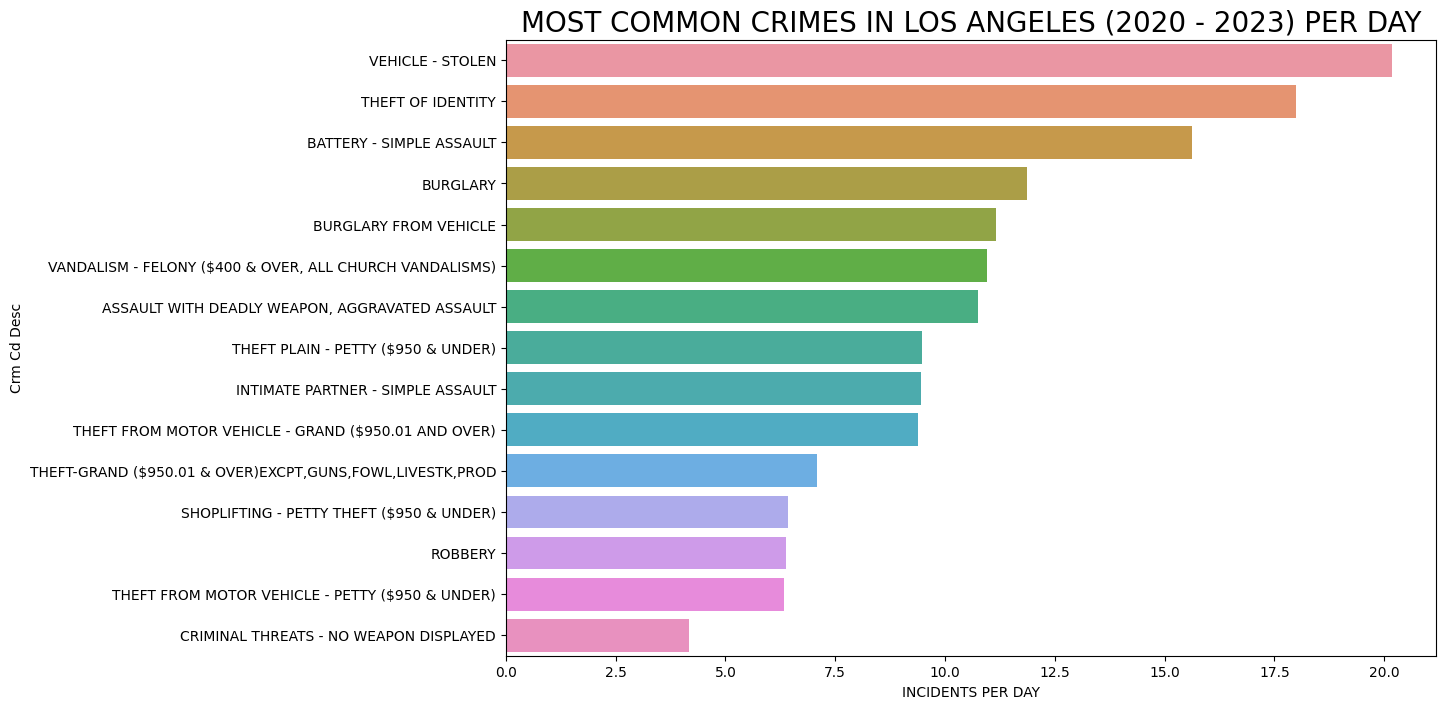

In [128]:
#crimes that takes place frequently
plt.rcParams["figure.figsize"] = (12, 8) # Set the default scale for the rest of the notebook
plt.rcParams['axes.titlesize'] = 20
sns.barplot(x = crime_freq.values[:15]/duration, y = crime_freq.index[:15])
plt.title("MOST COMMON CRIMES IN LOS ANGELES (2020 - 2023) PER DAY")
plt.xlabel("INCIDENTS PER DAY");

In Los Angeles, the analysis of the top 15 crimes reveals that Vehicle Theft is the most prevalent. Motor Vehicle Theft and Criminal Threats ranks 15th respectively.

In [129]:
# Analzing the top crimes
crime_freq_df = crime_freq.to_frame().reset_index()
crime_freq_df.columns = ["Crime", "Count"]
crime_freq_df['Percentage'] = crime_freq_df.Count/crime_freq_df.Count.sum()*100
crime_freq_df['CumPerc'] = crime_freq_df["Percentage"].cumsum()
crime_freq_df[crime_freq_df.CumPerc < 70]

,Crime,Count,Percentage,CumPerc
0,VEHICLE - STOLEN,25797,10.402519,10.402519
1,THEFT OF IDENTITY,23017,9.281497,19.684017
2,BATTERY - SIMPLE ASSAULT,19970,8.052809,27.736826
3,BURGLARY,15163,6.114409,33.851235
4,BURGLARY FROM VEHICLE,14280,5.758343,39.609578
5,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",14025,5.655516,45.265093
6,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",13738,5.539784,50.804878
7,THEFT PLAIN - PETTY ($950 & UNDER),12107,4.882091,55.686969
8,INTIMATE PARTNER - SIMPLE ASSAULT,12101,4.879672,60.566640
9,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,12002,4.839750,65.406391


**Frequency of criminal activities over time**

Analyzing the frequency of criminal activities over time, I will delve deeper to determine whether the crime rates exhibit an increasing or decreasing trend.

In [130]:
# Weekly occurance
crimes['Weekly_Occ'] = pd.DatetimeIndex(crimes["DATE OCC"]).to_period('W').to_timestamp()

# Monthly occurance
crimes['Monthly_occ'] = pd.DatetimeIndex(crimes['DATE OCC']).to_period('M').to_timestamp()

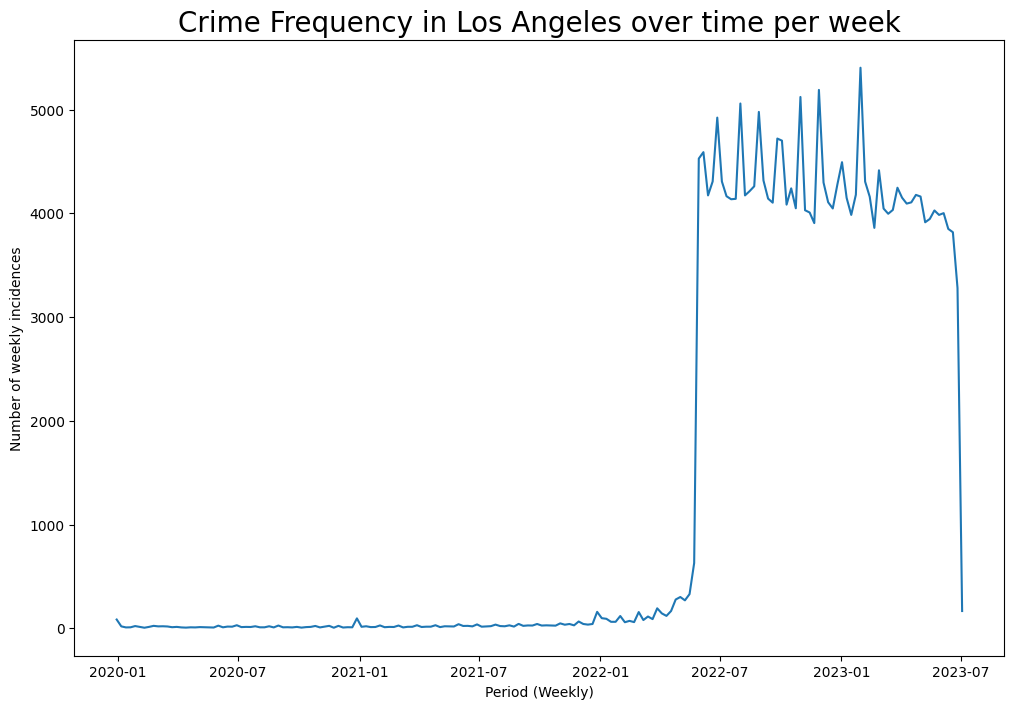

In [131]:
crime_occured = crimes.groupby("Weekly_Occ").count().reset_index()[["Weekly_Occ", "DR_NO"]]
plt.figure(figsize=(12,8))
sns.lineplot(x=crime_occured.Weekly_Occ, y=crime_occured.DR_NO)
plt.title("Crime Frequency in Los Angeles over time per week")
plt.ylabel("Number of weekly incidences")
plt.xlabel("Period (Weekly)");

**How long do people wait before reporting the crime**

We note from the dataset that there are two columns that focuses on crime occurrance and reported. How many instances weren't reported on the same day?

In [132]:
crimes['delay_reported'] = (crimes['Date Rptd'] - crimes['DATE OCC']).dt.days

In [134]:
crimes['delay_cat'] = pd.cut(x = crimes['delay_reported'], bins=[-1, 0, 1, 2, 7, 30, 365, np.inf],
                             labels=["Same day","1 day","2 days",'3-7 days','8-30 days','1 month-1 year','More than 1 year'])

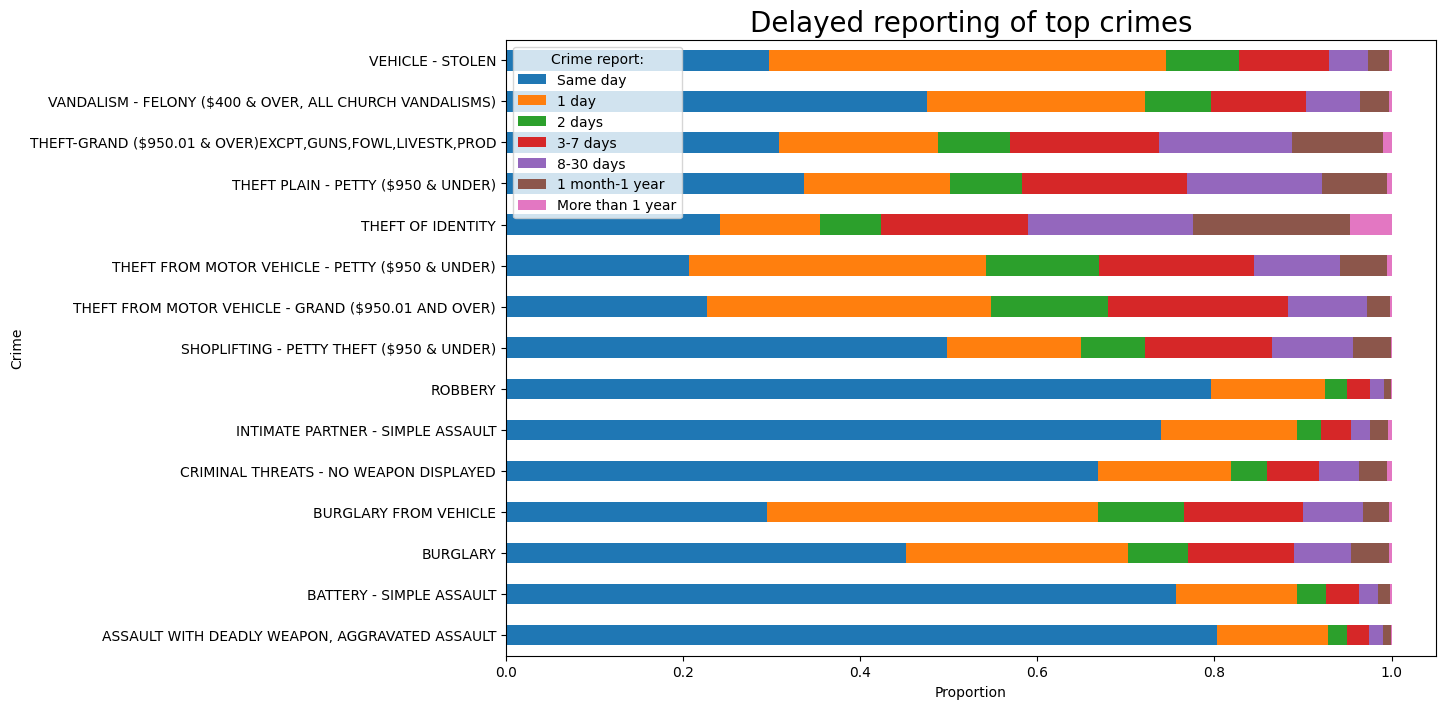

In [135]:
top_crime = crime_freq_df.iloc[:15,0]
top_crime_delay = crimes[crimes['Crm Cd Desc'].isin(top_crime)].groupby("Crm Cd Desc")['delay_cat'].value_counts(normalize=True).unstack()

top_crime_delay.plot.barh(stacked = True)
plt.title('Delayed reporting of top crimes')
plt.ylabel('Crime')
plt.xlabel('Proportion')
# plt.yticks(rotation = 45)
plt.legend(title = "Crime report:");

Most of the common crimes are reported within one day of the incident. Assault, vandalism, robbery, and stolen vehicles are reported very timely. However, burglary and theft are generally reported later, which may reflect the nature of those crimes that the victims may not notice them right away. Notably, theft of identity - the crime rising in popularity - also has the longest delay of report.

**Victims' Characteristics**

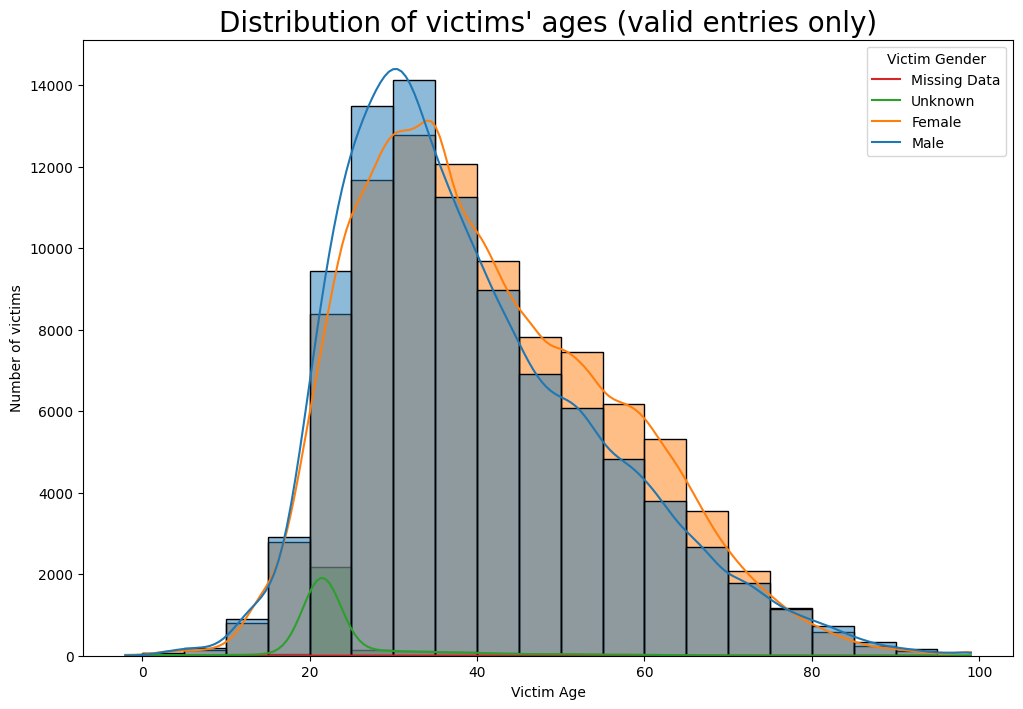

In [137]:
plt.figure(figsize=(12,8))
sns.histplot(data = crimes[crimes['Vict Age'] != 0], x = 'Vict Age', hue = 'Vict Sex', bins = np.arange(0,100,5), kde = True)
plt.title("Distribution of victims' ages (valid entries only)")
plt.xlabel("Victim Age")
plt.ylabel('Number of victims')
plt.legend(['Missing Data', 'Unknown', 'Female', 'Male'], title = "Victim Gender");

Most victims are between 20 and 40 years old, but it may not accurately reflect the vulnerability as there can simply be more people of this age in the city. If we assume a stable population dynamic in this city (the difference between age groups aren't very large), this data may point towards adult as the main victims. However, we should also consider that crimes involving children and elders tend to be underreported.

**Which races are targeted more?**

In [138]:
crimes['Ethnicity'] = crimes['Vict Descent'].transform(lambda x:
                                                 "Hispanic" if x=="H" 
                                else "Caucasian" if x=="W" 
                                else "Black" if x == "B" 
                                else "Unknown" if x=="X" 
                                else "Other" if x=="O" 
                                else "Pacific Islander" if x in ["G", "I", "P", "S", "U"] 
                                else "Asian")

<Axes: ylabel='count'>

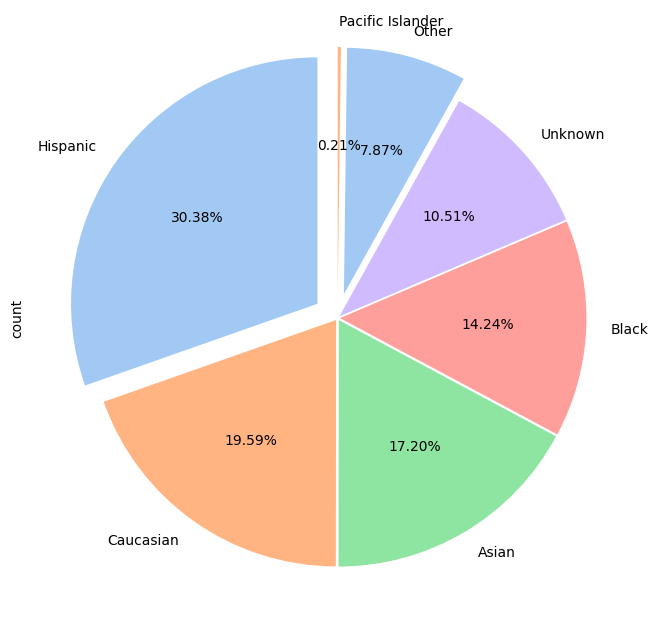

In [144]:
crimes['Ethnicity'].value_counts().plot(kind= 'pie', autopct = "%.2f%%", colors = sns.color_palette('pastel')[0:5], startangle=90, explode=[0.1,0.01,0.01,0.01,0.01,0.1,0.1])

From the number of victims, we may conclude that **Hispanic** people are being targeted the most, followed by **Caucasian**, then **Asians**, then **Black people**. However, to check for vulnerability, we must consider the distribution of races in the city, and it is impossible to conclude that within the given data.

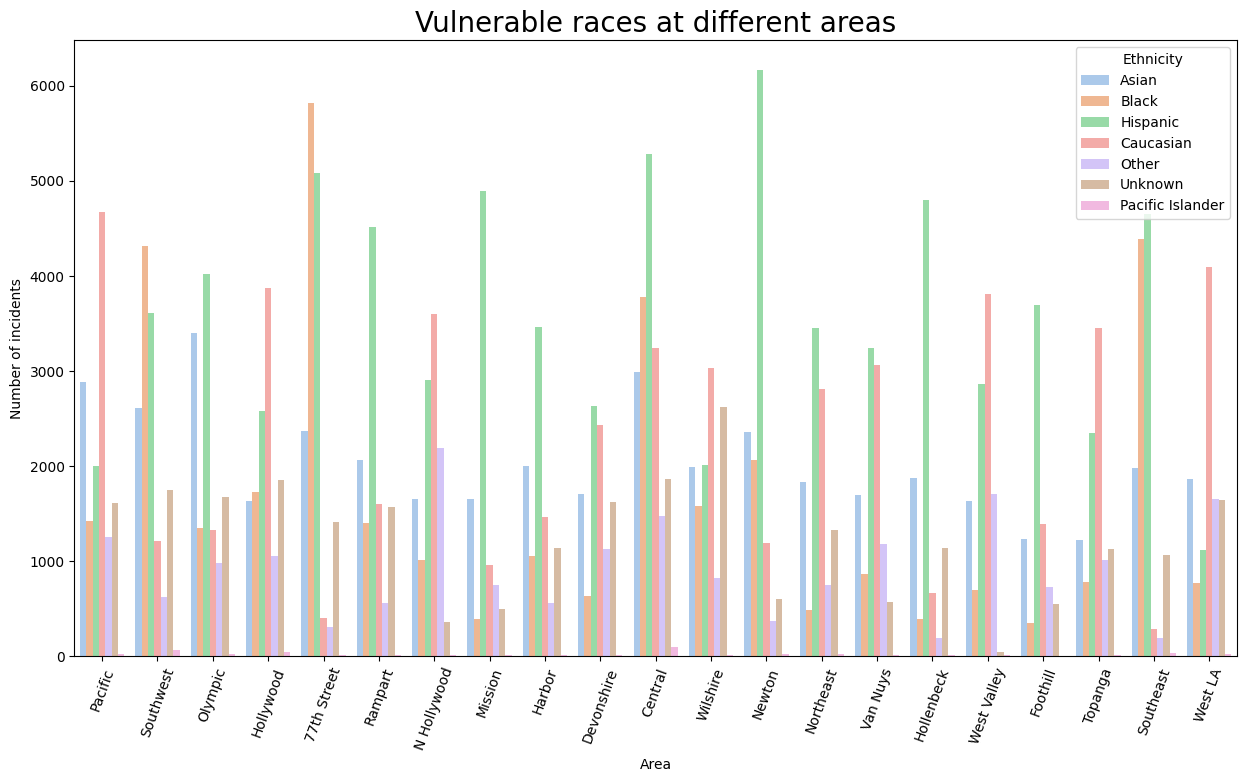

In [149]:
plt.figure(figsize= (15, 8))
sns.set_palette('pastel')
sns.countplot(data=crimes, x = 'AREA NAME', hue = 'Ethnicity', )
plt.xticks(rotation=70)
plt.title("Vulnerable races at different areas")
plt.ylabel("Number of incidents")
plt.xlabel("Area");